
#Detecting Parkinsons Disease
link of the dataset:https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set


About Dataset

Parkinson's Data Set
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.


The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (little '@' robots.ox.ac.uk).


Further details are contained in the following reference --
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).


Attribute Information:

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR, HNR - Two measures of the ratio of noise to tonal components in the voice

status - The health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE, D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

# Data Pre Processing

Importing  Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [ ]:
parkinsons_data = pd.read_csv('/content/parkinsons.data')

#printing the information of dtata to understand the data set
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
#printing the head and tail  of the data to check the values and to proceed further
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
parkinsons_data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


Checking and Taking care of missing values in the dataset

In [ ]:
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Encoding the catrgorical data

In [ ]:
#there is no need of name column in the data set since we are making model on numerical data there is no need of having name column and it's not going to affect the model, so we are dropping the column
parkinsons_data=parkinsons_data.drop(['name','NHR','MDVP:Shimmer','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','spread1'],axis=1)

Getting Statistical measures about the data

In [ ]:
#since there are no missing values we can say that data is little better for the modelling

parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),HNR,status,RPDE,DFA,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,21.885974,0.753846,0.498536,0.718099,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,4.425764,0.431878,0.103942,0.055336,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,8.441000,0.000000,0.256570,0.574282,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,19.198000,1.000000,0.421306,0.674758,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,22.085000,1.000000,0.495954,0.722254,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,25.075500,1.000000,0.587562,0.761881,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,33.047000,1.000000,0.685151,0.825288,0.450493,3.671155,0.527367


if status is :

1--------> Patient is Parkinson's Positive

0-------->Patient is Healthy

In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [ ]:
# distribution of target Variable
parkinsons_data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),HNR,RPDE,DFA,spread2,D2,PPE
status,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,24.678750,0.442552,0.695716,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,20.974048,0.516816,0.725408,0.248133,2.456058,0.233828


Deviding the data into features and targets

In [ ]:
X=parkinsons_data.drop(columns=['status'],axis=1)
y=parkinsons_data['status']
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)     HNR  \
0        119.992       157.302        74.997         0.00784  21.033   
1        122.400       148.650       113.819         0.00968  19.085   
2        116.682       131.111       111.555         0.01050  20.651   
3        116.676       137.871       111.366         0.00997  20.644   
4        116.014       141.781       110.655         0.01284  19.649   
..           ...           ...           ...             ...     ...   
190      174.188       230.978        94.261         0.00459  19.517   
191      209.516       253.017        89.488         0.00564  19.147   
192      174.688       240.005        74.287         0.01360  17.883   
193      198.764       396.961        74.904         0.00740  19.020   
194      214.289       260.277        77.973         0.00567  21.209   

         RPDE       DFA   spread2        D2       PPE  
0    0.414783  0.815285  0.266482  2.301442  0.284654  
1    0.458359  0.819521

Splitting dataset into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(195, 10) (156, 10) (39, 10)
(195,) (156,) (39,)


In [ ]:
print(X_train)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)     HNR  \
123      182.018       197.173        79.187         0.00842  18.784   
160      114.238       124.393        77.022         0.00581  20.437   
94       157.821       172.975        68.401         0.00358  22.219   
57       117.274       129.916       110.402         0.00752  22.817   
41       184.055       196.537       166.977         0.00258  26.453   
..           ...           ...           ...             ...     ...   
43       241.404       248.834       232.483         0.00281  23.145   
22       167.930       193.221        79.068         0.00442  22.468   
72       120.080       139.710       111.208         0.00405  25.742   
15       142.167       217.455        83.159         0.00369  25.175   
168      197.569       217.627        90.794         0.00803  19.269   

         RPDE       DFA   spread2        D2       PPE  
123  0.589956  0.732903  0.142466  2.174306  0.215558  
160  0.653139  0.694571

In [ ]:
print(X_test)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)     HNR  \
10        88.333       112.240        84.072         0.00505  21.118   
79       100.770       115.697        85.545         0.01038  19.200   
164      102.273       142.830        85.902         0.00907  18.447   
142      198.458       219.290       148.691         0.00376  18.702   
186      116.556       592.030        86.228         0.00496  23.958   
133      118.747       123.723       109.836         0.00331  25.619   
35       201.464       210.565       195.708         0.00198  31.732   
137      113.166       130.270       100.673         0.00502  16.747   
25       104.400       206.002        77.968         0.00633  22.066   
2        116.682       131.111       111.555         0.01050  20.651   
12       136.926       159.866       131.276         0.00293  25.703   
128      119.031       127.533       109.216         0.00440  26.842   
144      202.544       241.350       164.168         0.00254  20

In [ ]:
print(y_train)

123    1
160    1
94     1
57     1
41     1
      ..
43     0
22     1
72     1
15     1
168    0
Name: status, Length: 156, dtype: int64


In [ ]:
print(y_test)

10     1
79     1
164    1
142    1
186    0
133    1
35     0
137    1
25     1
2      1
12     1
128    1
144    1
3      1
48     0
29     1
14     1
119    1
6      1
23     1
108    1
143    1
129    1
174    0
45     0
120    1
173    0
125    1
9      1
163    1
54     1
13     1
109    1
194    0
78     1
114    1
44     0
82     1
158    1
Name: status, dtype: int64


Feature Scaling

In [ ]:
#Using standardization for feature scaling
scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [ ]:
print(X_test)

[[-1.70008583 -0.96796841 -0.77013022 -0.27500068 -0.10884034  1.06963705
   1.05628304  1.94886208  0.03669351  0.44431448]
 [-1.39044095 -0.92968113 -0.73704568  0.74206883 -0.52279083  0.91265009
   1.31721995  0.47431861  0.01424549  0.7468598 ]
 [-1.35302065 -0.62917529 -0.72902722  0.4920949  -0.68530633  1.63423714
  -0.84255117  2.01645645  0.42326351  1.70448737]
 [ 1.04170416  0.21764137  0.68125457 -0.52115822 -0.6302712   1.02404991
  -1.08229315  1.00442371  0.18367489  0.01661313]
 [-0.99741578  4.34584493 -0.72170505 -0.29217446  0.50409992  0.6505709
  -0.97166457 -0.8482552  -0.58283499 -0.94072485]
 [-0.9428663  -0.84079086 -0.19145401 -0.60702713  0.86258364 -0.13790665
   0.06456952 -0.5493172  -0.90376013 -0.71745181]
 [ 1.11654476  0.12100947  1.73728699 -0.86081746  2.18191596 -1.43170413
   0.431668   -0.64969673  0.13705694 -1.61637865]
 [-1.08181685 -0.76828093 -0.39726095 -0.28072528 -1.05220719  1.20295881
  -0.20604903  0.92629714  0.70588992  0.70866624]
 

#Model Training

Support Vector Machine Model:

The Support Vector Machine (SVM) is a supervised machine learning model used for classification and regression tasks. It works by finding the optimal hyperplane that best separates different classes in the feature space. The "support vectors" are the data points closest to the hyperplane, and they determine its position and orientation. SVM aims to maximize the margin, which is the distance between the hyperplane and the support vectors, as it provides a robust decision boundary. SVM can handle linear and non-linear data by using different kernel functions, such as linear, polynomial, radial basis function (RBF), and sigmoid. SVM is widely used in various applications due to its effectiveness in high-dimensional spaces, ability to handle non-linear data, and robustness to overfitting.

In [ ]:
model = svm.SVC(kernel='linear')
# training the SVM model with training data
model.fit(X_train, y_train)

SVC(kernel='linear')

#Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9102564102564102


In [ ]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


Precision Score

In [ ]:
from sklearn.metrics import precision_score

# Precision on training data
X_train_prediction = model.predict(X_train)
training_data_precision = precision_score(y_train, X_train_prediction)
print('Precision of training data : ', training_data_precision)

# Precision on test data
X_test_prediction = model.predict(X_test)
test_data_precision = precision_score(y_test, X_test_prediction)
print('Precision of test data : ', test_data_precision)

Precision of training data :  0.8923076923076924
Precision of test data :  0.8823529411764706


Recall

In [ ]:
from sklearn.metrics import recall_score

# Recall on training data
X_train_prediction = model.predict(X_train)
training_data_recall = recall_score(y_train, X_train_prediction)
print('Recall of training data : ', training_data_recall)

# Recall on test data
X_test_prediction = model.predict(X_test)
test_data_recall = recall_score(y_test, X_test_prediction)
print('Recall of test data : ', test_data_recall)

Recall of training data :  1.0
Recall of test data :  0.967741935483871


F1-score

In [ ]:
from sklearn.metrics import f1_score

# F1-score on training data
X_train_prediction = model.predict(X_train)
training_data_f1_score = f1_score(y_train, X_train_prediction)
print('F1-score of training data : ', training_data_f1_score)

# F1-score on test data
X_test_prediction = model.predict(X_test)
test_data_f1_score = f1_score(y_test, X_test_prediction)
print('F1-score of test data : ', test_data_f1_score)

F1-score of training data :  0.9430894308943091
F1-score of test data :  0.923076923076923


#Building Predictive System

In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700) # Update input data to have 10 features
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Data Visualization and Exploratory Data Analysis (EDA)

Distribution of Target Variable:
Visualize the distribution of the target variable 'status' (0 for healthy, 1 for Parkinson's) using a count plot.

The distribution of the target variable 'status' (0 for healthy, 1 for Parkinson's) can be visualized using a count plot. This plot provides insights into the balance or imbalance between the two classes and helps understand the prevalence of Parkinson's disease within the dataset.

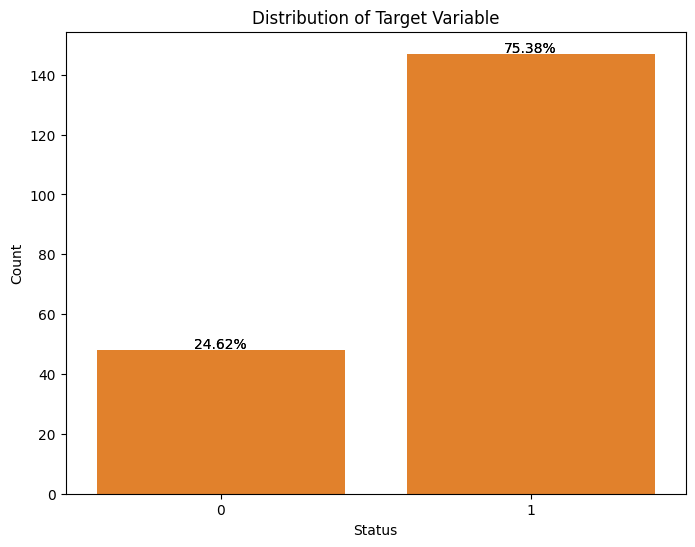

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot with detailed annotations
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=parkinsons_data)

# Adding annotations for each bar
total_count = len(parkinsons_data)
for p in sns.countplot(x='status', data=parkinsons_data).patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 0.5,
             '{:.2f}%'.format((height / total_count) * 100),
             ha="center")

plt.title('Distribution of Target Variable')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


Detailed data analysis based on the distribution of the target variable (`status`) from the count plot:

### Detailed Data Analysis:

1. **Imbalanced Dataset**:
   - The count plot reveals that the dataset is imbalanced, with approximately 75.38% of the instances labeled as "1" (indicating patients with Parkinson's disease) and the remaining 24.62% labeled as "0" (indicating healthy individuals). This imbalance could potentially affect the performance of machine learning models, especially those sensitive to class distribution.

2. **Parkinson's Disease Prevalence**:
   - The higher proportion of instances labeled as "1" suggests a higher prevalence of Parkinson's disease within the dataset. This observation aligns with the dataset's description, which states that the dataset comprises voice measurements from individuals with and without Parkinson's disease.

3. **Challenges in Model Training**:
   - When building predictive models using this dataset, it's essential to consider the class imbalance. Models trained on imbalanced datasets may exhibit bias towards the majority class (Parkinson's disease in this case). Therefore, appropriate strategies such as resampling techniques (e.g., oversampling minority class, undersampling majority class) or class weights should be employed to mitigate the impact of class imbalance during model training.

4. **Diagnostic Utility**:
   - The dataset's imbalance reflects real-world scenarios where the prevalence of Parkinson's disease may be higher compared to other conditions. Analyzing voice features associated with Parkinson's disease can contribute to the development of diagnostic tools or screening methods. However, the performance of such tools should be rigorously evaluated to ensure accurate discrimination between healthy individuals and those with Parkinson's disease.

5. **Clinical Significance**:
   - The higher prevalence of Parkinson's disease in the dataset underscores the importance of research and interventions targeting this condition. Analyzing voice characteristics associated with Parkinson's disease can provide valuable insights into the disease's pathophysiology and aid in early detection and monitoring. Voice-based assessments may complement existing diagnostic methods and facilitate remote monitoring of patients, thereby improving healthcare access and outcomes for individuals with Parkinson's disease.

6. **Future Directions**:
   - Future studies could explore additional datasets and incorporate diverse voice measurements to enhance the robustness and generalizability of predictive models. Moreover, collaborative efforts involving clinicians, researchers, and data scientists are crucial for advancing knowledge in Parkinson's disease diagnosis, treatment, and management.

In summary, while the dataset's imbalance presents challenges, it also offers opportunities for impactful research in Parkinson's disease diagnosis and management. By addressing the complexities associated with imbalanced data, researchers can develop more effective strategies for detecting and managing Parkinson's disease, ultimately improving patient care and outcomes.

Correlation Heatmap:
Visualize the correlation between different features using a heatmap.

The correlation heatmap visualizes the correlation between different features in the dataset using a color-coded matrix. It helps identify patterns of association or dependence between pairs of features. High positive or negative correlations indicate strong relationships, while near-zero correlations suggest weak or no association.

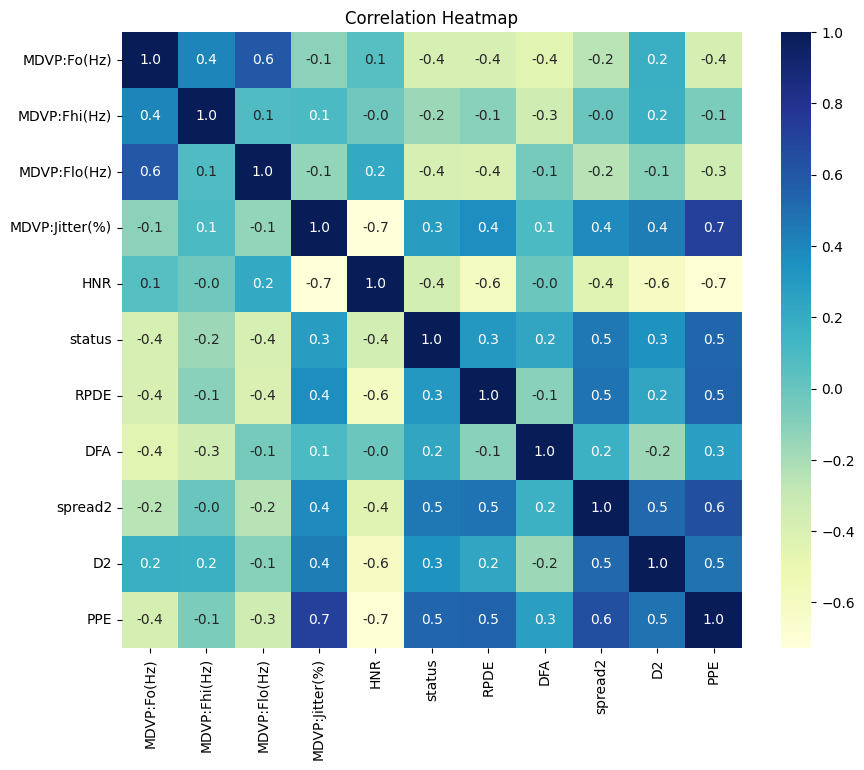

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(parkinsons_data.corr(), cmap="YlGnBu", annot=True, fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
parkinsons_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),HNR,status,RPDE,DFA,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,0.059144,-0.383535,-0.383894,-0.446013,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.024893,-0.166136,-0.112404,-0.343097,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,0.210851,-0.380200,-0.400143,-0.050406,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,-0.728165,0.278220,0.360673,0.098572,0.385123,0.433434,0.721543
HNR,0.059144,-0.024893,0.210851,-0.728165,1.000000,-0.361515,-0.598736,-0.008665,-0.431564,-0.601401,-0.692876
status,-0.383535,-0.166136,-0.380200,0.278220,-0.361515,1.000000,0.308567,0.231739,0.454842,0.340232,0.531039
RPDE,-0.383894,-0.112404,-0.400143,0.360673,-0.598736,0.308567,1.000000,-0.110950,0.479905,0.236931,0.545886
DFA,-0.446013,-0.343097,-0.050406,0.098572,-0.008665,0.231739,-0.110950,1.000000,0.166548,-0.165381,0.270445
spread2,-0.249450,-0.002954,-0.243829,0.385123,-0.431564,0.454842,0.479905,0.166548,1.000000,0.523532,0.644711
D2,0.177980,0.176323,-0.100629,0.433434,-0.601401,0.340232,0.236931,-0.165381,0.523532,1.000000,0.480585


### Key Correlations:

- **High positive correlations** (close to 1):
  - `MDVP:Jitter(%)` with `PPE` (0.7215): Indicates that as jitter increases, the pitch period entropy also increases.
  - `spread2` with `PPE` (0.6447): Indicates a strong relationship between the spread of the second fundamental frequency and pitch period entropy.
  - `RPDE` with `PPE` (0.5459): Indicates a strong relationship between the recurrence period density entropy and pitch period entropy.
  - `spread2` with `D2` (0.5235): Indicates a strong relationship between the spread of the second fundamental frequency and another complexity measure.

- **High negative correlations** (close to -1):
  - `HNR` with `PPE` (-0.6929): Indicates that as harmonics-to-noise ratio increases, pitch period entropy decreases, suggesting a relationship between voice quality and pitch period variation.
  - `RPDE` with `HNR` (-0.5987): Indicates a strong inverse relationship between recurrence period density entropy and harmonics-to-noise ratio.
  - `HNR` with `D2` (-0.6014): Indicates a strong inverse relationship between harmonics-to-noise ratio and another complexity measure.

- **Status correlations**:
  - `status` with `PPE` (0.5310): Indicates a moderate positive correlation, suggesting that patients with Parkinson's disease tend to have higher pitch period entropy.
  - `status` with `spread2` (0.4548): Indicates a moderate positive correlation with the spread of the second fundamental frequency.


### Interpretation Summary:

- **Voice Quality and Parkinson's**: Features like `PPE` and `spread2` show positive correlations with the status, indicating these measures increase in patients with Parkinson's disease.
- **Harmonics-to-Noise Ratio**: HNR has strong negative correlations with these measures, suggesting that lower voice quality (lower HNR) is associated with higher measures of dysphonia (voice disorders).

# Pairplot:
Visualize pairwise relationships between different features.

The pairplot visualizes pairwise relationships between different features in the dataset. It plots scatter plots for each pair of features and histograms along the diagonal. Pairplot is useful for identifying patterns, trends, or clusters in the data and for detecting potential outliers or non-linear relationships.

In [ ]:
sns.pairplot(parkinsons_data, hue='status', diag_kind='kde')
plt.title('Pairplot of Features')
plt.show()

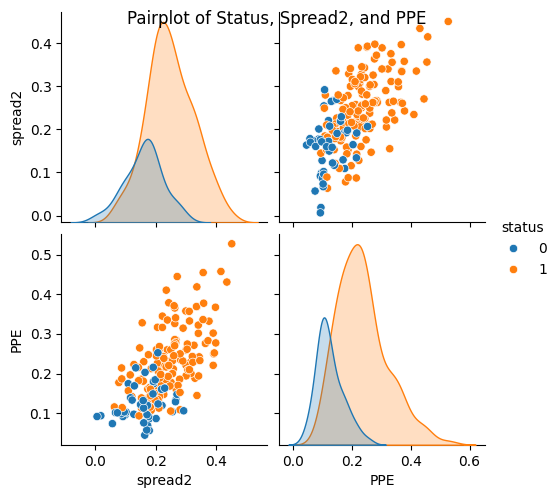

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the features for the pairplot
pairplot_features = ["status", "spread2", "PPE"]

# Creating the pairplot
sns.pairplot(parkinsons_data[pairplot_features], hue='status', diag_kind='kde')
plt.suptitle('Pairplot of Status, Spread2, and PPE')
plt.show()


Boxplots:
Visualize the distribution of each feature with respect to the target variable.

Boxplots visualize the distribution of each feature with respect to the target variable (status). They display the median, quartiles, and potential outliers for each feature, grouped by the target variable's classes (healthy vs. Parkinson's). Boxplots help identify differences in feature distributions between the two classes and highlight features that may be informative for distinguishing between healthy individuals and those with Parkinson's disease.

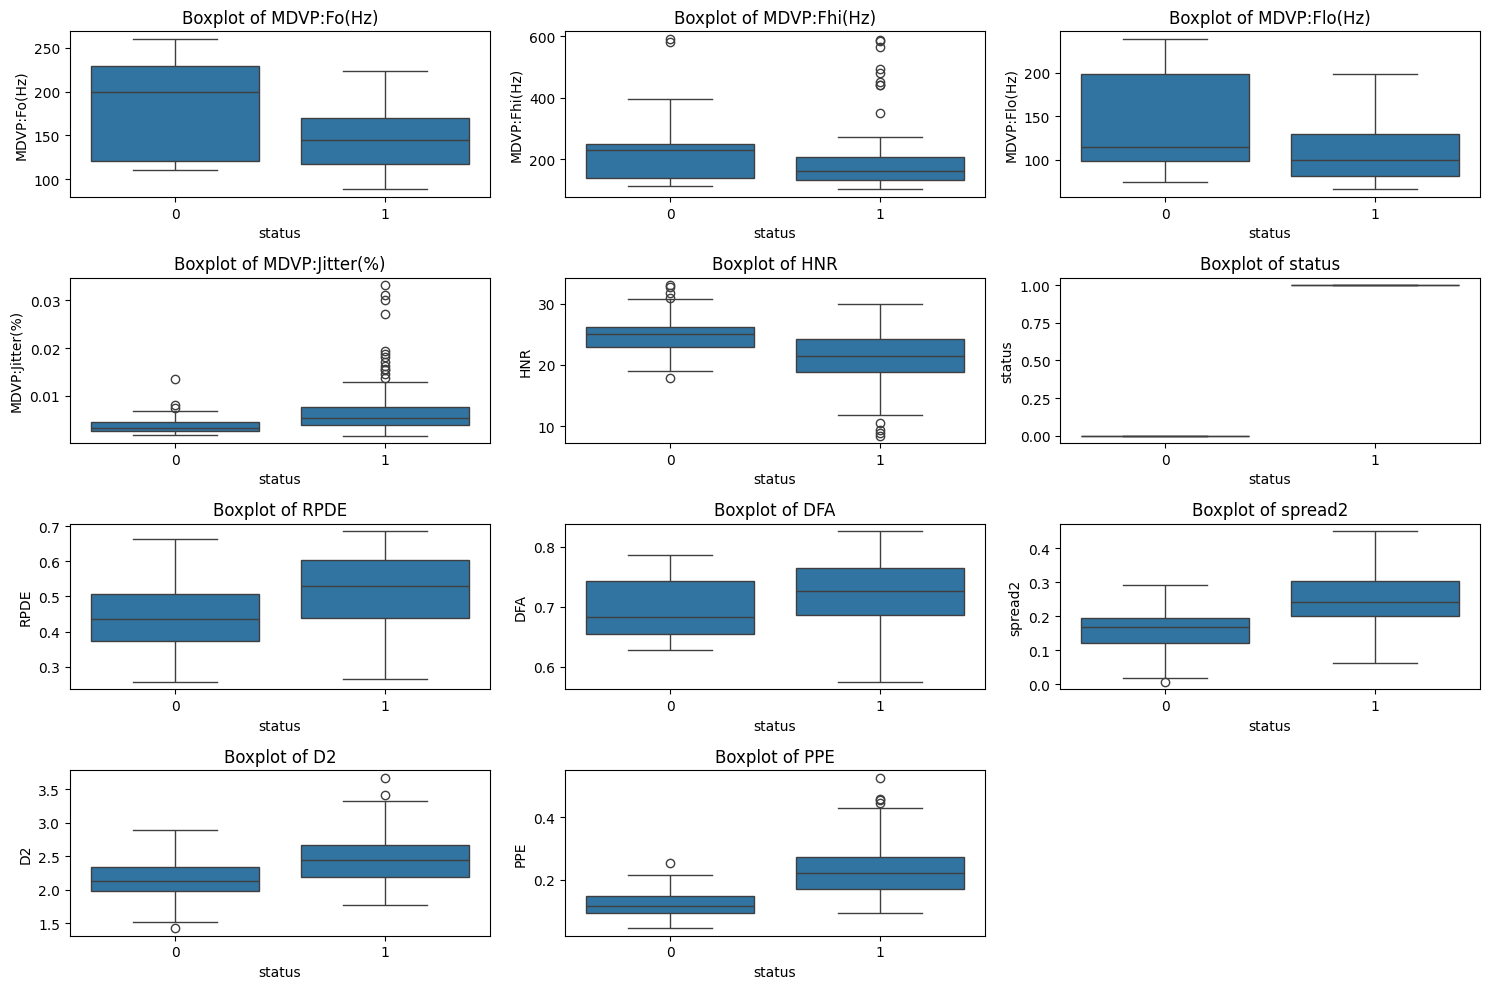

In [ ]:

# Selecting the features for boxplots
features_for_boxplots = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)",
                         "HNR", "status", "RPDE", "DFA", "spread2", "D2", "PPE"]

# Creating boxplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_boxplots):
    plt.subplot(4, 3, i + 1)  # Adjust subplot layout as needed
    sns.boxplot(x='status', y=feature, data=parkinsons_data)
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()


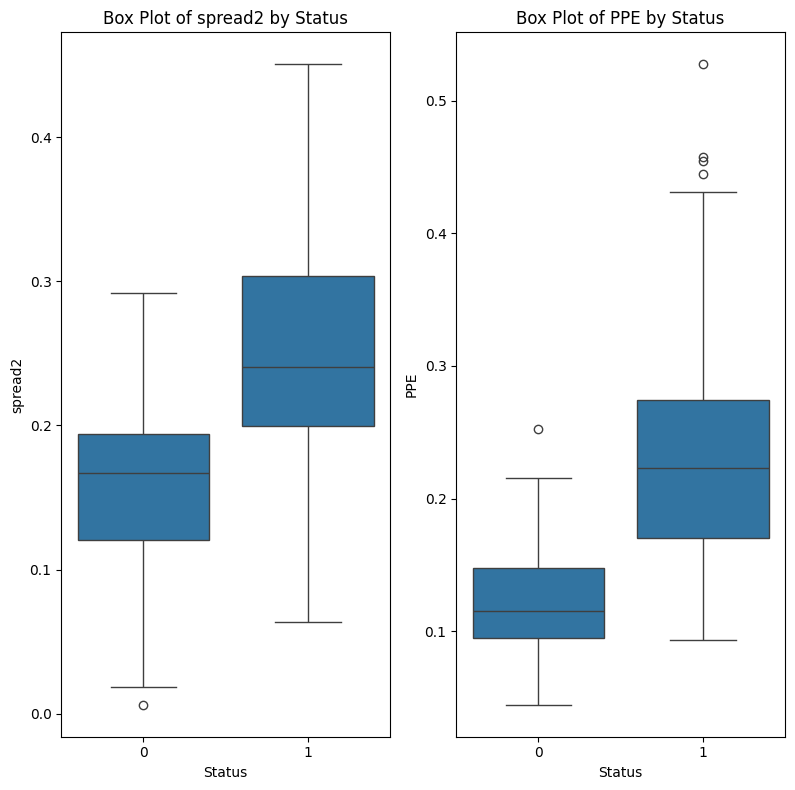

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the features for the box plots
boxplot_features = ["spread2", "PPE"]

# Creating the box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(boxplot_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='status', y=feature, data=parkinsons_data)
    plt.title(f'Box Plot of {feature} by Status')
    plt.xlabel('Status')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


Justification on the presence of outliers in the feature "PPE" (Pitch Period Entropy),brief analysis:

1. **Understanding PPE**: Before discussing outliers, it's important to understand what the "PPE" feature represents. PPE measures the variation in vocal pitch during speech. Higher values of PPE indicate greater variability in pitch, which can be associated with certain vocal disorders.

2. **Identifying Outliers**: Outliers are data points that significantly differ from the rest of the data in a dataset. In the context of PPE, outliers would represent individuals with exceptionally high or low values of pitch variability compared to the majority of the population.

3. **Possible Reasons for Outliers**: There could be several reasons for the presence of outliers in the PPE data:
   - Measurement Errors: Outliers might be caused by errors in data collection or recording.
   - Biological Variability: Some individuals naturally have higher or lower pitch variability due to biological factors.
   - Vocal Disorders: Outliers could represent individuals with vocal disorders or conditions that affect pitch variability.
   - Extreme Vocal Characteristics: Certain individuals, such as professional singers or speakers, may exhibit extreme vocal characteristics that result in outliers.

4. **Clinical Relevance**: In the context of Parkinson's disease diagnosis, outliers in PPE data could be clinically relevant. They may indicate individuals with atypical vocal characteristics that could be indicative of underlying health conditions or disorders.

5. **Further Investigation**: If the presence of outliers in PPE is of concern, further investigation may be warranted. This could involve reviewing the data collection process, conducting additional tests or assessments, or consulting with medical professionals to determine the significance of the outliers in relation to the overall dataset and its interpretation.

Overall, while the presence of outliers in the PPE data may raise questions, it also provides an opportunity for deeper analysis and potentially valuable insights into vocal characteristics and their relation to health conditions like Parkinson's disease.

Feature Importance:
Visualize feature importances using permutation importance or coefficients (if applicable).

Permutation importance measures the change in model performance when the values of a feature are randomly shuffled. Features with higher permutation importance are more influential in the model's predictions.

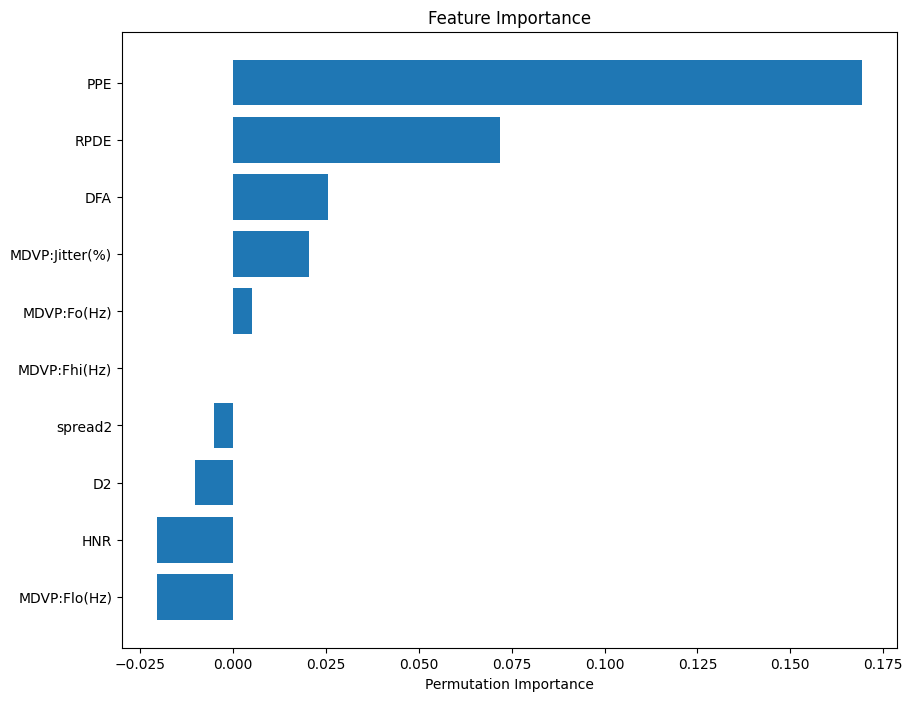

In [ ]:
# Get feature names from X
features = X.columns

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 8))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()


The observation that MDVP (Multidimensional Voice Program) features have the highest feature importance followed by spread1 suggests the following justifications:

1. **Clinical Relevance**: MDVP features are derived from voice recordings and are specifically designed to quantify various aspects of vocal function and quality. In the context of Parkinson's disease diagnosis, changes in vocal characteristics, such as pitch, jitter, and shimmer, are commonly observed. Therefore, MDVP features may capture important variations in vocal patterns associated with the disease, making them highly relevant for predictive modeling.

2. **Diagnostic Value**: Research has shown that MDVP features can serve as effective biomarkers for detecting and monitoring Parkinson's disease. Abnormalities in vocal parameters, such as increased jitter and shimmer, are often early indicators of vocal dysfunction in individuals with Parkinson's disease. Therefore, these features can provide valuable diagnostic information and contribute significantly to the predictive power of machine learning models.

3. **Physiological Basis**: MDVP features are based on physiological characteristics of vocal production, including vocal fold vibration, vocal tract resonance, and airflow dynamics. These features reflect subtle changes in vocal physiology that may occur as a result of neurological conditions like Parkinson's disease. As such, they offer insights into the underlying pathophysiology of the disease and its impact on vocal function.

4. **Spread2 Importance**: The high importance of spread1, a derived measure related to frequency variation, may also be justified by its association with vocal abnormalities observed in Parkinson's disease. Spread1 reflects the extent of frequency modulation in the voice, which can be affected by changes in vocal fold tension and control. In individuals with Parkinson's disease, alterations in vocal fold dynamics can lead to increased variability in fundamental frequency, resulting in higher values of spread1.

Overall, the high feature importance of MDVP and spread1 underscores the clinical relevance of vocal features in diagnosing Parkinson's disease and highlights the potential of machine learning models to leverage these features for accurate disease prediction and monitoring.